In [3]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision

In [4]:
class MNISTDataset(Dataset):
    def __init__(self, filePath):
        self.x, self.y = torch.load(filePath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [5]:
trainingDS = MNISTDataset("/Users/derek/Downloads/MNIST/processed/training.pt")
testingDS = MNISTDataset("/Users/derek/Downloads/MNIST/processed/test.pt")

In [6]:
trainDL = DataLoader(trainingDS, batch_size=5)

In [7]:
L = nn.CrossEntropyLoss()

Network itself

In [8]:
class MNISTNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.R(self.Matrix3(x))
        return x.squeeze()

In [9]:
def trainModel(dl, f, n_epochs=20):
    opt = SGD(f.parameters(), lr=.01)
    L = nn.CrossEntropyLoss()

    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f'epoch {epoch}')
        N = len(dl)
        for i, (x,y) in enumerate(dl):
            # update weights
            opt.zero_grad()
            loss_value = L(f(x),y)
            loss_value.backward()
            opt.step() # apply adjustments
            # store data about training
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [10]:
f = MNISTNeuralNet()

In [11]:
epoch_data, loss_data = trainModel(trainDL, f)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19


In [12]:
epoch_data_ave = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_ave = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross entropy (per epoch)')

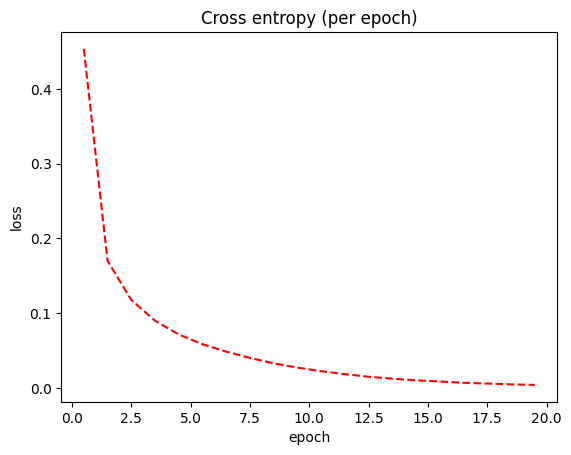

In [13]:
plt.plot(epoch_data_ave, loss_data_ave, "r--")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Cross entropy (per epoch)")

# Now to try with test set:

In [14]:
xs, ys = testingDS[0:2000]
yhats = f(xs).argmax(axis=1)

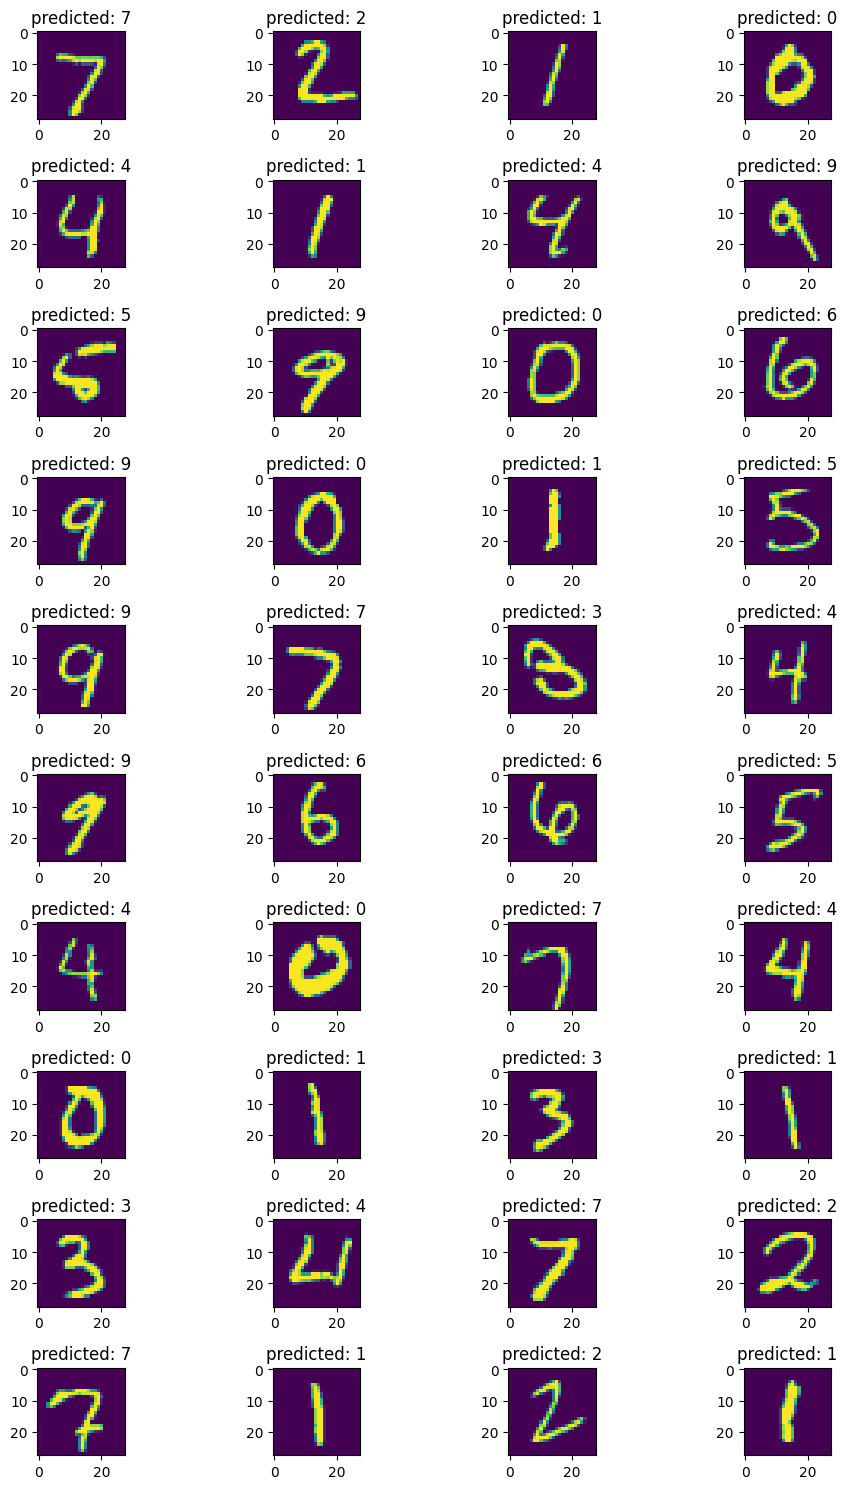

In [15]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4,i+1)
    plt.imshow(xs[i])
    plt.title(f'predicted: {yhats[i]}')
fig.tight_layout()
plt.show()

Awesome!!

Lest see the data now:

In [23]:
# first and last pass in training data loss:
print(loss_data[0])
print(loss_data[-1])

2.280341291427612
5.912719552725321e-06


# data for unseen testing data: